# Part 2 - Multimodal Capabilities (Images, Audio, Video, Documents)

Gemini models like `gemini-2.5-flash-preview-05-20` can process text, images, audio, video, and documents in a single prompt using `client.models.generate_content()`. This enables powerful multimodal AI applications that can understand and generate content across different media types.

**Key Capabilities:**
- **Visual Understanding**: Analyze images, extract text, identify objects
- **Audio Processing**: Transcribe speech, analyze music, understand audio content
- **Video Analysis**: Summarize videos, extract key frames, understand motion
- **Document Processing**: Extract information from PDFs, understand layouts
- **Multimodal Generation**: Create images and speech from text prompts

In [ ]:
%pip install pillow

In [14]:
from google import genai
from google.genai import types
import os
import sys
import requests
from PIL import Image
from io import BytesIO

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
else:
    GEMINI_API_KEY = os.environ.get('GEMINI_API_KEY',None)

# Create client with api key
MODEL_ID = "gemini-2.5-flash-preview-05-20"
client = genai.Client(api_key=GEMINI_API_KEY)

## 1. Image Understanding: Single Image

Gemini can analyze images in multiple formats: PIL `Image` objects, raw bytes, or uploaded files via the File API.

**When to use each method:**
- **Raw bytes**: When working with image data from APIs or memory
- **File API**: Large images (>20MB), when you want to reuse images across multiple requests

In [15]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1582k  100 1582k    0     0  5923k      0 --:--:-- --:--:-- --:--:-- 5925k


In [19]:
with open('image.jpg', 'rb') as f:
    image_bytes = f.read()

prompt_specific = "Are there any fruits visible?"

response_specific = client.models.generate_content(
    model=MODEL_ID,
    contents=["What is this image?",
            types.Part.from_bytes(data=image_bytes, mime_type="image/jpeg")]
)
print(response_specific.text)

This image depicts a vibrant and playful collection of **decorated cupcakes** arranged on a wooden table, alongside various baking tools and ingredients.

Here's a breakdown of what's visible:

*   **Numerous Cupcakes:** There are approximately 15 cupcakes, each with different colored frostings (pink, chocolate, vanilla, red) and a wide array of toppings.
*   **Playful Decorations:** Many cupcakes are adorned with colorful sprinkles, candy beads, and most notably, white candy eyes that give them a "monster" or "googly-eyed" appearance. Some have single eyes, others two, creating whimsical characters.
*   **Baking Supplies:** In the background and scattered on the table, various kitchen items are visible, including:
    *   Jars filled with colorful sprinkles.
    *   Metal canisters holding wooden spatulas, spoons, and a rolling pin.
    *   Small bowls, some containing more sprinkles.
    *   A jar of white liquid (possibly milk or frosting).
    *   A wooden rolling pin.
    *   In t

You can use the File API for large payloads (>20MB).

> The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

In [20]:
file_id = client.files.upload(file="../assets/data/Cupcakes.jpg")

response = client.models.generate_content(
    model=MODEL_ID,
    contents=["What is this image?", file_id]
)

print(response.text)

This image captures a vibrant, high-angle shot of a wooden table laden with freshly baked and creatively decorated cupcakes, surrounded by various baking implements and ingredients.

Here's a detailed breakdown:

*   **Cupcakes:** There are approximately 15-16 cupcakes arranged across the table, showcasing a delightful assortment of colors and designs. Many feature playful candy googly eyes, giving them a whimsical "monster" or "creature" appearance.
    *   Frosting colors include various shades of pink, white, chocolate brown, and yellow/cream.
    *   Toppings range from generous amounts of colorful rainbow sprinkles to specific colored sprinkles (red, pink) and small decorative candy balls (blue).
    *   The cake bases appear to be a mix of chocolate/dark and vanilla/light.
*   **Baking Supplies:** Baking implements and ingredients are arranged in the background and midground, suggesting an active baking session:
    *   **Sprinkles:** A large glass jar overflowing with rainbow sp

> The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

## 2. Image Understanding: Multiple Images

Gemini can analyze and compare multiple images simultaneously, which is powerful for comparative analysis, visual storytelling, or understanding sequences.

In [23]:
image_url_1 = "https://plus.unsplash.com/premium_photo-1694819488591-a43907d1c5cc?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D" # Dog
image_url_2 = "https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" # Cat

image_response_req_1 = requests.get(image_url_1)
image_response_req_2 = requests.get(image_url_2)


response_multi = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_text(text="Compare these two images. What are the main subjects in each, and what are they doing?"),
        types.Part.from_text(text="Image 1:"), types.Part.from_bytes(data=image_response_req_1.content, mime_type="image/jpeg"),
        types.Part.from_text(text="Image 2:"), types.Part.from_bytes(data=image_response_req_2.content, mime_type="image/jpeg")
    ]
)
print(response_multi.text)

Let's compare these two delightful images:

**Image 1:**

*   **Main Subject:** The main subject is a **golden retriever puppy**. It's easily identifiable by its light golden fur, typical retriever features, and its relatively small size.
*   **What it's doing:** The puppy is **sitting upright** on a soft, light-colored fabric (likely a sheet or blanket) that serves as the background. It is **looking directly at the camera** with a curious and attentive expression, its head slightly tilted, as if posing or trying to understand what's happening. It's wearing a bright orange collar.

**Image 2:**

*   **Main Subject:** The main subject is a **tabby cat**, likely a young one or a small adult. It's characterized by its distinct striped and mottled fur pattern, prominent whiskers, and large green/yellow eyes.
*   **What it's doing:** The cat is **sitting or standing still**, with its head and upper body visible against a plain, dark background. It is also **looking directly at the camera** 

## 3. !! Exercise: Product Description from Image !!

Use Gemini to analyze an image of a product and generate a detailed description, including features, use cases, and a marketing slogan.

Tasks:
- Find an image URL of a product (e.g., a backpack, a mug, a piece of electronics).
- Use the `requests` library to get the image content from the URL.
- Create a `types.Part` object from the image bytes.
- Create a text `types.Part` object containing a prompt that asks the model about the Product. 
- Call `client.models.generate_content()` with the `MODEL_ID` and a list containing your text prompt part and the image part.



In [24]:
product_image_url = "https://images.unsplash.com/file-1705123271268-c3eaf6a79b21image?w=416&dpr=2&auto=format&fit=crop&q=60"


exercise_img_req = requests.get(product_image_url)
image = types.Part.from_bytes(data=exercise_img_req.content, mime_type="image/jpeg")

exercise_prompt_text = types.Part.from_text(text="""
    Based on the image provided:
    1. Identify the main product shown.
    2. Describe its key visual features (color, material if discernible, style).
    3. Suggest 2-3 potential use cases for this product.
    4. Write a short, catchy marketing slogan for it.
    """)

exercise_response = client.models.generate_content(
    model=MODEL_ID,
    contents=[exercise_prompt_text, image]
)
print(exercise_response.text)

Based on the image provided:

1.  **Main Product:** The main product shown is a **modern laptop**.

2.  **Key Visual Features:**
    *   **Color:** The laptop's chassis is a dark, matte grey or charcoal, giving it a sophisticated and professional look. The screen displays a website with a light, off-white background and dark blue text, contrasting with a darker, earthy tone for the image section.
    *   **Material (if discernible):** It appears to be made of a premium material, likely aluminum or a similar metal alloy, suggested by its slim profile, precise edges, and matte finish.
    *   **Style:** It features a very sleek, minimalist, and contemporary design with thin bezels around the large display. The keyboard is black with subtly defined keys, and there's a prominent, large trackpad. Its overall aesthetic suggests high-end, functional elegance.

3.  **Potential Use Cases:**
    *   **Professional Work & Productivity:** Ideal for remote work, business tasks, document creation, a

## 4. Audio Understanding

Gemini can process audio files for transcription, content analysis, speaker identification, and audio summarization. This is particularly useful for podcasts, meetings, interviews, and voice memos.

**Supported audio formats**: MP3, WAV, FLAC, AAC, and other common formats

In [28]:
file_path = "../assets/data/audio.mp3"

file_id = client.files.upload(file=file_path)

# Generate a structured response using the Gemini API
prompt = """Generate a transcript of the episode. Include timestamps and identify speakers.

Speakers:
- John

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If you really don't know the speaker's name, identify them with a letter of the alphabet, eg there may be an unknown speaker 'A' and another unknown speaker 'B'.

If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If there is some other sound playing try to identify the sound, eg:
[01:02] [Bell ringing]

Each individual caption should be quite short, a few short sentences at most.

Signify the end of the episode with [END].

Don't use any markdown formatting, like bolding or italics.

Only use characters from the English alphabet, unless you genuinely believe foreign characters are correct.

It is important that you use the correct words and spell everything correctly. Use the context of the podcast to help.
If the hosts discuss something like a movie, book or celebrity, make sure the movie, book, or celebrity name is spelled correctly."""
audio_part = types.Part.from_uri(file_uri=file_id.uri, mime_type=file_id.mime_type)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, audio_part]
)
print(response.text)

[00:00] John: If the Porsche Macan has proven anything,
[00:02] John: it's that the days of sacrificing performance for practicality are gone.
[00:06] John: Long gone.
[00:08] John: Engineered to deliver a driving experience like no other,
[00:11] John: the Macan has demonstrated excellence in style and performance,
[00:15] John: to become the leading sports car in its class.
[00:17] John: So don't let those five doors fool you.
[00:19] John: Once you're in the driver seat,
[00:21] John: one thing will become immediately clear.
[00:22] [Car accelerating]
[00:24] John: This is a Porsche.
[00:26] John: The Macan,
[00:27] John: now leasing from 3.99%.
[00:29] John: Conditions apply.
[00:31] [JINGLE]
[END]


## 5. Video Understanding

Gemini can process video files to understand their content, analyze scenes, identify objects and actions, and provide detailed summaries.

**Video capabilities:**
- Scene analysis and summarization
- Object and action recognition
- Temporal understanding (what happens when)
- Content extraction and key moments
- YouTube video analysis

In [36]:
from time import sleep

video_path = "../assets/data/standup.mp4"

video_file_id = client.files.upload(file=video_path)
def wait_for_file_ready(file_id):
    while file_id.state == "PROCESSING":
        sleep(1)
        file_id = client.files.get(name=file_id.name)
        wait_for_file_ready(file_id)
    return file_id

video_file_id = wait_for_file_ready(video_file_id)


prompt = "Describe the main events in this video. What is the primary subject?"
video_part = types.Part.from_uri(file_uri=video_file_id.uri, mime_type=video_file_id.mime_type)



response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, video_part]
)

print(response.text)

Waiting for file to be ready: FileState.PROCESSING
Waiting for file to be ready: FileState.ACTIVE
The video features a man performing what appears to be a stand-up comedy routine on a stage.

**Main Events:**
*   The man stands center stage, holding a microphone.
*   He begins to tell a joke about visiting a zoo that only had one dog, a Shih Tzu.
*   He gestures with his free hand and smiles.
*   Laughter from the audience can be heard as he delivers the punchline.

**Primary Subject:**
The primary subject is a **stand-up comedian performing a joke** for an audience.


### YouTube Video Analysis

The Gemini API supports direct YouTube URL analysis, which is very convenient for content analysis:

In [37]:
# Analyze a YouTube video directly
youtube_url = "https://www.youtube.com/watch?v=dwgmfSOZNoQ"  # Google Cloud Next '25 Opening Keynote

youtube_part = genai.types.Part(
    file_data=genai.types.FileData(file_uri=youtube_url)
)
prompt = "What was the biggest Gemini announcement in this video?"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, youtube_part]
)

print(response.text)

The biggest Gemini announcements in this video were:

*   The general availability of **Gemini 2.5 Pro** in AI Studio, Vertex AI, and the Gemini app (announced at 1:43).
*   The upcoming release of **Gemini 2.5 Flash**, a new low-latency and most cost-efficient model (announced at 1:54).
*   The ability to run **Gemini on Google Distributed Cloud** for air-gapped and connected environments (announced at 3:11).


## 6. !! Exercise: Summarize a YouTube Video !!

Analyze a YouTube video using its URL and generate a summary or transcript.

Tasks:
- Find a YouTube video URL (e.g., a tutorial, news segment, or educational video).
- Create a `genai.types.Part` object from the YouTube URL. You can use `genai.types.Part(file_data=genai.types.FileData(file_uri=youtube_url))` for this.
- Define a prompt asking the model to perform a task, such as summarizing the video.
- Call `client.models.generate_content()` with the `MODEL_ID`, your prompt, and the YouTube video part.

In [38]:
youtube_url = "https://www.youtube.com/watch?v=o7U4DV9Fkc0"

youtube_part = genai.types.Part(
    file_data=genai.types.FileData(file_uri=youtube_url)
)

prompt = "Summarize the video in 3 sentences."

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, youtube_part]
)

print(response.text)

At Google I/O, co-founder Sergey Brin and Senior Product Manager Logan Kilpatrick discuss the significant AI advancements announced, expressing excitement about the rapid progress across Google's models and products. Sergey highlights the "superhuman" capabilities of the core Gemini text model and the compelling nature of generative media like VEO with integrated audio. They emphasize Google's long-standing foundation as an AI company, leveraging continuous breakthroughs in areas like reasoning and diffusion techniques to drive impactful innovation, culminating in a gift of a physical TPU v4.


**Try these variations:**
- Analyze a tutorial video and extract step-by-step instructions
- Summarize a news video and identify key facts vs. opinions
- Analyze a product review and extract pros/cons
- Process an educational video and create study notes

## 7. Working with PDF/Document Files

Gemini can extract information from PDFs and other document formats, making it excellent for document analysis, data extraction, and content summarization.

**Common use cases:**
- Invoice processing and data extraction
- Contract analysis and summarization
- Research paper analysis
- Form processing and validation
- Document classification and routing

In [39]:
pdf_file_path = "../assets/data/rewe_invoice.pdf"

pdf_file_id = client.files.upload(file=pdf_file_path)

prompt = "What is the total amount due?"
pdf_part = types.Part.from_uri(file_uri=pdf_file_id.uri, mime_type=pdf_file_id.mime_type)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, pdf_part]
)
print(response.text)

The total amount due is **22,67 EUR**.

This is indicated by:
*   "SUMME EUR 22,67"
*   "Geg. VISA EUR 22,67" (payment received)
*   "Gesamtbetrag" (Total amount) in the tax breakdown also shows 22,67 under "Brutto".


## 7. Code 

Gemini is good at understanding and generating code. Let's use [gitingest](https://github.com/cyclotruc/gitingest) to chat with a GitHub repo:

In [ ]:
%pip install gitingest

In [49]:
from gitingest import ingest_async

summary, tree, content = await ingest_async("https://github.com/philschmid/nextjs-gemini-2-0-pdf-structured-data")

In [50]:
print(summary)

Repository: philschmid/nextjs-gemini-2-0-pdf-structured-data
Files analyzed: 28

Estimated tokens: 13.7k


In [51]:
print(tree)

Directory structure:
└── philschmid-nextjs-gemini-2-0-pdf-structured-data/
    ├── README.md
    ├── Dockerfile
    ├── LICENSE
    ├── components.json
    ├── empty-module.ts
    ├── eslint.config.mjs
    ├── next.config.ts
    ├── package.json
    ├── postcss.config.mjs
    ├── tailwind.config.ts
    ├── tsconfig.json
    ├── app/
    │   ├── globals.css
    │   ├── layout.tsx
    │   ├── page.tsx
    │   └── api/
    │       ├── extract/
    │       │   └── route.ts
    │       └── schema/
    │           └── route.ts
    ├── components/
    │   ├── FileUpload.tsx
    │   ├── PdfViewer.tsx
    │   ├── PromptInput.tsx
    │   ├── ResultDisplay.tsx
    │   ├── providers.tsx
    │   └── ui/
    │       ├── button.tsx
    │       ├── card.tsx
    │       ├── input.tsx
    │       ├── popover.tsx
    │       ├── sheet.tsx
    │       └── textarea.tsx
    ├── lib/
    │   └── utils.ts
    └── public/



In [52]:
prompt = f"""Explain what repository is about:

Code:
{content}
"""

chat = client.chats.create(model=MODEL_ID)

response = chat.send_message(prompt)
print(response.text)

Based on the provided files, a "repository" (often shortened to "repo") refers to a central location where all the files, folders, and history related to a specific software project are stored.

Think of it as a **complete container or package for a project**.

Here's what a repository is about, specifically in the context of the files you provided:

1.  **A Collection of All Project Files:** It holds every piece of code, configuration, documentation, and other assets necessary for the project.
    *   In your example, the repository for "PDF to Structured Data with Next.js and Gemini 2.0" contains:
        *   **Source Code:** All the `.ts`, `.tsx`, and `.css` files (e.g., `app/page.tsx`, `components/FileUpload.tsx`, `app/globals.css`).
        *   **Configuration Files:** `package.json`, `next.config.ts`, `tsconfig.json`, `tailwind.config.ts`, `eslint.config.mjs`, `postcss.config.mjs`, `components.json`. These define how the project is built, run, and its dependencies.
        *   **

In [53]:
response = chat.send_message("How are the schemas defined?")
print(response.text)

In this project, the schemas are **not statically defined** in the code. Instead, they are **dynamically generated by the Google Gemini 2.0 AI model** based on user input.

Here's a breakdown of how the schemas are defined and used:

1.  **User Provides a Natural Language Prompt:**
    *   In the web interface (`components/PromptInput.tsx`), the user types a description of the data they want to extract from the PDF. For example: "Extract all invoice details including invoice number, date, items, prices, and total amount..."

2.  **Frontend Sends Prompt to Backend API:**
    *   When the user submits their prompt (`app/page.tsx`'s `handlePromptSubmit` function), a `POST` request is made to the `/api/schema` endpoint.

3.  **Backend Uses Gemini to Generate Schema:**
    *   The `app/api/schema/route.ts` file handles this request.
    *   It defines a `META_PROMPT` which is a detailed set of instructions for the Gemini AI model. This `META_PROMPT` tells Gemini:
        *   To act as a "JS

In [54]:
response = chat.send_message("Update all schema route to use the new Gemini 2.5 models, `gemini-2.5-flash-preview-05-20`. Return only the updated file.")
print(response.text)

```typescript
import { NextResponse } from "next/server";
import { GoogleGenerativeAI } from "@google/generative-ai";

const genAI = new GoogleGenerativeAI(process.env.GEMINI_API_KEY!);
const MODEL_ID = "gemini-2.5-flash-preview-05-20"; // Updated to the new model ID

const META_PROMPT = `
You are a JSON Schema expert. Your task is to create JSON schema based on the user input. The schema will be used for extra data.  

You must also make sure:
- All fields in an object are set as required
- All objects must have properties defined
- Order matters! If the values are dependent or would require additional information, make sure to include the additional information in the description. Same counts for "reasoning" or "thinking" should come before the conclusion.
- $defs must be defined under the schema param
- Return only the schema JSON not more, use \`\`\`json to start and \`\`\` to end the JSON schema

Restrictions:
- You cannot use examples, if you think examples are helpful include th

## 9. Image Generation

Generate high-quality images using Gemini's image generation capabilities. This feature is perfect for creating visual content, prototypes, marketing materials, and creative projects.

**Image Generation Features:**
- Text-to-image generation
- Style control through prompts
- High-resolution output
- SynthID watermarking for authenticity
- Multiple aspect ratios and sizes

Text response: I will generate a photo of a cat. The image will feature a fluffy tabby cat with bright green eyes, sitting peacefully on a weathered wooden porch. Sunlight will dapple through the leaves of a nearby tree, casting soft shadows on its fur. The background will be slightly blurred, drawing focus to the feline subject.



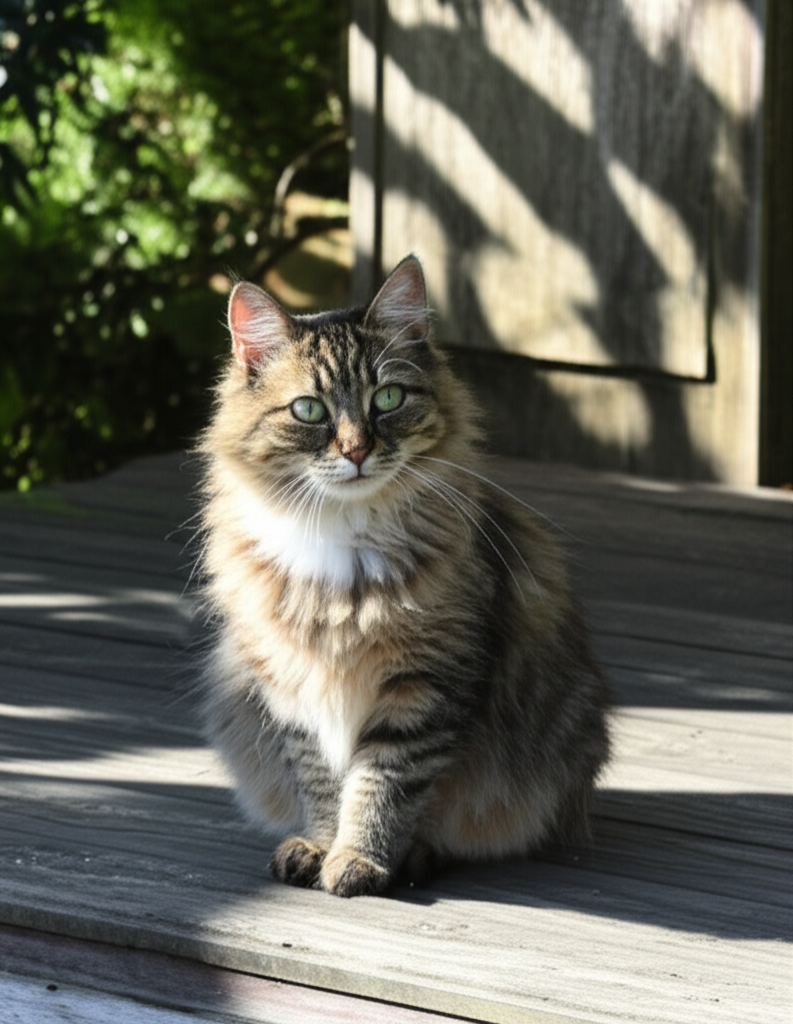

In [55]:
from PIL import Image
from io import BytesIO


prompt_text = "A photo of a cat"

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=prompt_text,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

# Process the response
image_saved = False
for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(f"Text response: {part.text}")
  elif part.inline_data is not None and part.inline_data.mime_type.startswith('image/'):
      image = Image.open(BytesIO(part.inline_data.data))
      image_filename = 'gemini_generated_image.png'
      image.save(image_filename)

image

**Image Generation Tips:**
- Be specific about style (photorealistic, illustration, cartoon, etc.)
- Include lighting and mood descriptors
- Specify composition details (close-up, wide shot, etc.)
- Mention art styles or references when relevant
- Consider aspect ratio and resolution needs

> **Note**: All generated images include a SynthID watermark for authenticity verification. More details in the [official documentation](https://ai.google.dev/gemini-api/docs/image-generation).

## 10. Text to Speech

Convert text into natural-sounding speech with controllable voice characteristics. This feature enables creating audio content, accessibility features, and interactive applications.

**TTS Capabilities:**
- Multiple voice options and styles
- Controllable pace, tone, and emotion
- Single-speaker and multi-speaker audio
- High-quality audio output
- Natural language voice direction

For this example, we'll use the `gemini-2.5-flash-preview-tts` model to generate single-speaker audio. You'll need to set the `response_modalities` to `["AUDIO"]` and provide a `SpeechConfig`.

In [ ]:
%pip install soundfile numpy

In [59]:
import soundfile as sf
import numpy as np
from IPython.display import Audio, display

text_to_speak = "Say cheerfully: AI Eingeering Worlds Fair is the best conference in the world!"

response_tts = client.models.generate_content(
   model="gemini-2.5-flash-preview-tts", # Specific model for TTS
   contents=text_to_speak,
   config=types.GenerateContentConfig(
      response_modalities=["AUDIO"],
      speech_config=types.SpeechConfig(
         voice_config=types.VoiceConfig(
            prebuilt_voice_config=types.PrebuiltVoiceConfig(
               voice_name='Kore', # Choose from available prebuilt voices
            )
         )
      ),
   )
)

audio_array = np.frombuffer(response_tts.candidates[0].content.parts[0].inline_data.data, dtype=np.int16)
sf.write("generated_speech.wav", audio_array, 24000)
display(Audio("generated_speech.wav"))

## !! Exercise: Avatar Generation !!

Combine image generation and text-to-speech capabilities to create a visual avatar and an audio introduction for it.


1.  **Generate an Avatar Image:**
    - Write a descriptive prompt for an avatar image (e.g., "A friendly, futuristic robot assistant with a welcoming smile, digital art style, high resolution").
    - Use `client.models.generate_content()` with the model `gemini-2.0-flash-preview-image-generation`.
    - Set `response_modalities=['TEXT', 'IMAGE']` in `GenerateContentConfig`.
    - Process the response to extract the image data (from `part.inline_data.data` where `mime_type` starts with `image/`).
    - Save the image (e.g., as `generated_avatar.png`) using `PIL.Image` and `BytesIO`.
    - Display the generated image.
2.  **Create an Introduction Text:**
    - Write a short introductory sentence for your avatar (e.g., "Hello! I am Vision, your friendly AI assistant. I'm excited to help you generate amazing things!").
3.  **Generate Speech for the Introduction:**
    - Use `client.models.generate_content()` with the model `gemini-2.5-flash-preview-tts`.
    - For the `contents`, you can augment the introduction text with a description of the avatar to influence the voice (e.g., f"Say in a voice based on this image description {{your_image_prompt}}: {{your_introduction_text}}").
    - Configure `GenerateContentConfig` with `response_modalities=["AUDIO"]`.
    - Set up `speech_config` within the `GenerateContentConfig` to select a `prebuilt_voice_config` (e.g., `voice_name='Puck'`).
    - Process the response to get the audio data (from `part.inline_data.data`).
    - Convert the audio data to a NumPy array and save it as a WAV file (e.g., `avatar_introduction.wav`) using `soundfile`.
    - Provide a way to play the audio (e.g., `IPython.display.Audio`).

Text response: I will generate a digital painting of a friendly, futuristic robot assistant. The robot will have a smooth, metallic body with glowing blue accents and a screen displaying a warm, welcoming smile. The artwork will be in a digital art style with a high level of detail and resolution.



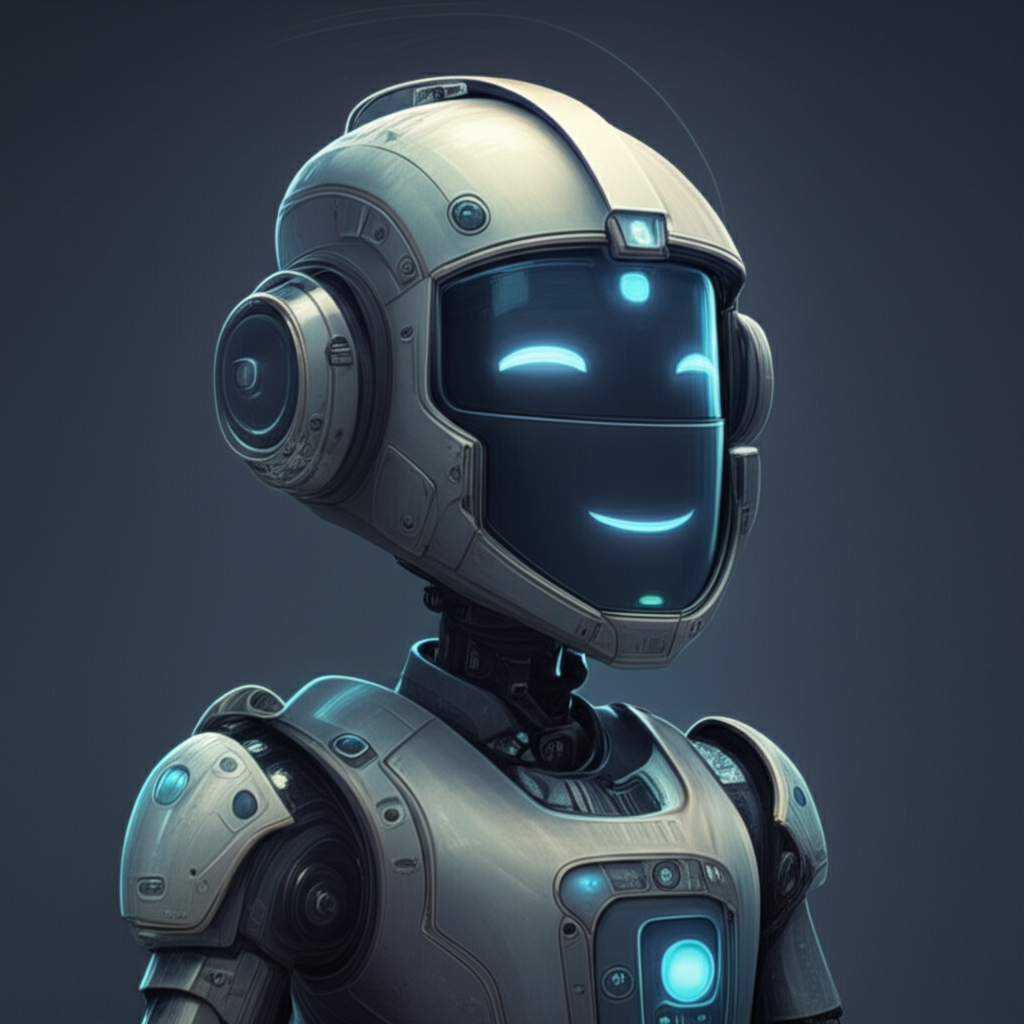

In [67]:
prompt_avatar_image = "Generate an inage of a friendly, futuristic robot assistant with a welcoming smile, digital art style, high resolution"

response_image = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=prompt_avatar_image,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE'] # TEXT is often included by default or good practice
    )
)

# Process the response
image_saved = False
for part in response_image.candidates[0].content.parts:
  if part.text is not None:
    print(f"Text response: {part.text}")
  elif part.inline_data is not None and part.inline_data.mime_type.startswith('image/'):
      image = Image.open(BytesIO(part.inline_data.data))
      image.save("generated_avatar.png")

avatar_introduction_text = "Hello! I am Vision, your friendly AI assistant. I'm excited to help you generate amazing things!"

response_speech = client.models.generate_content(
   model="gemini-2.5-flash-preview-tts",
   contents=f"Say in an voice based on this image description {prompt_avatar_image}: {avatar_introduction_text}",
   config=types.GenerateContentConfig(
      response_modalities=["AUDIO"],
      speech_config=types.SpeechConfig(
         voice_config=types.VoiceConfig(
            prebuilt_voice_config=types.PrebuiltVoiceConfig(
               voice_name='Puck', # An upbeat voice
            )
         )
      ),
   )
)

audio_array_speech = np.frombuffer(response_speech.candidates[0].content.parts[0].inline_data.data, dtype=np.int16)
sf.write("avatar_introduction.wav", audio_array_speech, 24000)

display(Image.open("generated_avatar.png"))
display(Audio("avatar_introduction.wav"))

## Recap & Next Steps

**What You've Learned:**
- Image understanding with single and multiple image analysis for various use cases
- Audio processing including speech transcription and audio content analysis
- Video analysis for scene understanding and YouTube content processing
- Document processing with PDF analysis and structured data extraction
- Code understanding for repository analysis and code review
- Creative generation with image creation and text-to-speech synthesis
- Multimodal integration combining different content types for rich applications
- File API usage for efficient handling of large files and reusable content

**Key Takeaways:**
- Use File API for large files (>20MB) and content you'll reuse multiple times
- Implement comprehensive error handling for network and API operations
- Structure prompts clearly and specifically for consistent, high-quality outputs
- Monitor token usage across different modalities for effective cost control
- Consider user experience and processing time for multimedia operations

**Next Steps:** Continue with [Part 3: Structured Outputs, Function Calling & Tools](https://github.com/philschmid/gemini-2.5-ai-engineering-workshop/blob/main/notebooks/03-structured-outputs-function-calling-tools.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/philschmid/gemini-2.5-ai-engineering-workshop/blob/main/notebooks/03-structured-outputs-function-calling-tools.ipynb)

**More Resources:**
- [Vision Understanding Documentation](https://ai.google.dev/gemini-api/docs/vision?lang=python)
- [Audio Understanding Documentation](https://ai.google.dev/gemini-api/docs/audio?lang=python)
- [Image Generation Guide](https://ai.google.dev/gemini-api/docs/image-generation)
- [Text-to-Speech Documentation](https://ai.google.dev/gemini-api/docs/speech-generation)